In [1]:
import pandas as pd # Data analysis and manipultion tool
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf # Deep Learning Tool
import os # OS module in Python provides a way of using operating system dependent functionality
import cv2 # Library for image processing
from sklearn.model_selection import train_test_split # For splitting the data into train and validation set
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from imutils import build_montages
from imutils import paths
import random
import cv2

In [3]:
Data = pd.read_csv(r"G:\PYTHON\FinalYr_Phase-2\Meta_data.csv")

In [4]:
Data.head()

,Unnamed: 0,path,value
0,0,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1.png,0
1,1,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-10.png,0
2,2,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-100.png,0
3,3,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1000.png,0
4,4,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1001.png,0


In [5]:
Data.drop(Data.columns[0], axis=1, inplace=True)

In [6]:
Data.head()

,path,value
0,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1.png,0
1,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-10.png,0
2,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-100.png,0
3,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1000.png,0
4,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1001.png,0


In [7]:
Data['split'] = np.random.randn(Data.shape[0], 1)

msk = np.random.rand(len(Data)) <= 0.8

train = Data[msk]
test = Data[~msk]

In [8]:
print(train.value.value_counts())
print(test.value.value_counts())

0    2902
2    2824
1    1610
Name: value, dtype: int64
0    714
2    676
1    435
Name: value, dtype: int64


In [9]:
train.reset_index(inplace=True)

In [10]:
train.drop(train.columns[0], axis=1, inplace=True)
train.head()

C:\Users\Bhanu\anaconda3\envs\gpu\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,path,value,split
0,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-10.png,0,0.137604
1,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-100.png,0,-1.199561
2,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1000.png,0,-0.087460
3,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1001.png,0,1.688971
4,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1002.png,0,-0.364535


In [11]:
data = []
image_size = 224
test_pixel_data = []
import matplotlib.pyplot as plt
from PIL import Image


for i in range(len(train)):
    img_array = Image.open(train['path'][i])
    new_img_array = np.array(img_array)
    if new_img_array.ndim == 2:
        new_img_array = cv2.cvtColor(new_img_array, cv2.COLOR_GRAY2BGR)
    new_img_array = cv2.resize(new_img_array,(224,224))
    #print(i,np.array(new_img_array).shape,train['value'][i])
    data.append([new_img_array, train['value'][i]])


In [12]:
test.reset_index(inplace=True)

In [13]:
test.drop(test.columns[0], axis=1, inplace=True)
test.head()

C:\Users\Bhanu\anaconda3\envs\gpu\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,path,value,split
0,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1.png,0,-1.596653
1,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1003.png,0,-0.133501
2,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1009.png,0,-0.219877
3,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1021.png,0,-2.438383
4,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1027.png,0,-1.083271


In [14]:
for i in range(len(test)):
    img_array = Image.open(test['path'][i])
    new_img_array = np.array(img_array)
    if new_img_array.ndim == 2:
        new_img_array = cv2.cvtColor(new_img_array, cv2.COLOR_GRAY2BGR)
    new_img_array = cv2.resize(new_img_array,(224,224))
    test_pixel_data.append(new_img_array)

In [15]:
np.random.shuffle(data)
x = []
y = []

counter = 406
count = 0

for image in data:
    try:
        x.append(image[0])
        y.append(image[1])
    except:
        print(count)
    count += 1

# converting x & y to numpy array as they are list
x = np.array(x)
y = np.array(y)

In [16]:
np.unique(y, return_counts=True)

(array([0, 1, 2], dtype=int64), array([2902, 1610, 2824], dtype=int64))

In [17]:
pd.Series(y).value_counts()

0    2902
2    2824
1    1610
dtype: int64

In [18]:
X_train, X_val, y_train, y_val = train_test_split(x,y,test_size=0.2, random_state = 42,stratify=y)

In [19]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [20]:
test_pixel_data = np.array(test_pixel_data)

test_pixel_data = test_pixel_data/255

print(X_train.shape,X_val.shape,test_pixel_data.shape)

(5868, 224, 224, 3) (1468, 224, 224, 3) (1825, 224, 224, 3)


In [21]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow(X_train,y_train,batch_size=8)

val_generator = val_datagen.flow(X_val,y_val,batch_size=8)

In [22]:
print(X_train.shape,y_train.shape,X_val.shape)

(5868, 224, 224, 3) (5868, 3) (1468, 224, 224, 3)


In [23]:
from tensorflow.keras.applications import VGG16,InceptionV3,DenseNet201
from keras.layers import *
from keras.models import Sequential
from keras.regularizers import *
from tensorflow.keras.optimizers import Adam

In [24]:
def build_model():
    model = Sequential()

    conv_base = InceptionV3(input_shape=(224,224,3), include_top=False, pooling='max',weights='imagenet')
    model.add(conv_base)
    model.add(BatchNormalization())
    model.add(Dense(2048, activation='relu', kernel_regularizer=l1_l2(0.01)))
    model.add(BatchNormalization())
  # model.add(Dense(2048, activation='relu', kernel_regularizer=l1_l2(0.01)))
  # model.add(BatchNormalization())
  # model.add(Dense(2048, activation='relu', kernel_regularizer=l1_l2(0.01)))
  # model.add(BatchNormalization())
  # model.add(Dense(1024, activation='relu', kernel_regularizer=l1_l2(0.01)))
  # model.add(BatchNormalization())
    model.add(Dense(3, activation='softmax'))
    for layer in model.layers:
        layer.trainable = True
 
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy',"Precision","Recall"])

    return model

In [25]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2048)              21802784  
_________________________________________________________________
batch_normalization_94 (Batc (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 2048)              4196352   
_________________________________________________________________
batch_normalization_95 (Batc (None, 2048)              8192      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 6147      
Total params: 26,021,667
Trainable params: 25,979,043
Non-trainable params: 42,624
_________________________________________________________________


C:\Users\Bhanu\anaconda3\envs\gpu\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [26]:
cbs = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=3, min_lr=1e-5, verbose=0),
tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-6, patience=10, verbose=1, mode='auto')]

In [27]:
from tensorflow.python.keras.callbacks import TensorBoard
from time import time
Tensorboard = TensorBoard(log_dir="G:\PYTHON\FinalYr_Phase-2\logs\{}".format(time()))

In [28]:
%%timeit -n1 -r1 
with tf.device("GPU"):
    model.fit(train_generator,steps_per_epoch=87,epochs=100,validation_data=val_generator,validation_steps=22,callbacks=[cbs,Tensorboard])

Epoch 1/100
87/87 [==============================] - 48s 283ms/step - loss: 695.7737 - accuracy: 0.7256 - precision: 0.7379 - recall: 0.6997 - val_loss: 571.1516 - val_accuracy: 0.7045 - val_precision: 0.7325 - val_recall: 0.6534
Epoch 2/100
87/87 [==============================] - 22s 249ms/step - loss: 465.9817 - accuracy: 0.8233 - precision: 0.8343 - recall: 0.8103 - val_loss: 367.1613 - val_accuracy: 0.8125 - val_precision: 0.8424 - val_recall: 0.7898
Epoch 3/100
87/87 [==============================] - 24s 272ms/step - loss: 288.8076 - accuracy: 0.8324 - precision: 0.8367 - recall: 0.8295 - val_loss: 220.0648 - val_accuracy: 0.5057 - val_precision: 0.5086 - val_recall: 0.5057
Epoch 4/100
87/87 [==============================] - 23s 261ms/step - loss: 166.0404 - accuracy: 0.8534 - precision: 0.8590 - recall: 0.8491 - val_loss: 121.5818 - val_accuracy: 0.6534 - val_precision: 0.6571 - val_recall: 0.6534
Epoch 5/100
87/87 [==============================] - 22s 255ms/step - loss: 92.0

Epoch 20/100
87/87 [==============================] - 21s 244ms/step - loss: 3.7200 - accuracy: 0.9195 - precision: 0.9194 - recall: 0.9181 - val_loss: 4.4696 - val_accuracy: 0.4943 - val_precision: 0.4971 - val_recall: 0.4886
Epoch 21/100
87/87 [==============================] - 21s 244ms/step - loss: 2.9610 - accuracy: 0.9310 - precision: 0.9309 - recall: 0.9296 - val_loss: 2.0613 - val_accuracy: 0.9659 - val_precision: 0.9651 - val_recall: 0.9432
Epoch 22/100
87/87 [==============================] - 22s 257ms/step - loss: 2.6018 - accuracy: 0.9095 - precision: 0.9145 - recall: 0.9066 - val_loss: 3.7279 - val_accuracy: 0.7045 - val_precision: 0.7110 - val_recall: 0.6989
Epoch 23/100
87/87 [==============================] - 21s 245ms/step - loss: 2.1074 - accuracy: 0.9440 - precision: 0.9494 - recall: 0.9440 - val_loss: 2.1119 - val_accuracy: 0.8750 - val_precision: 0.9096 - val_recall: 0.8580
Epoch 24/100
87/87 [==============================] - 21s 246ms/step - loss: 2.4614 - accura

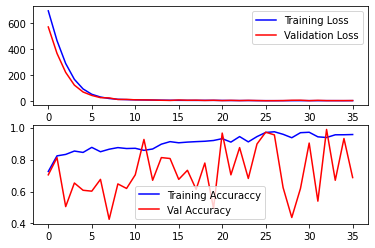

In [32]:
fig, ax  = plt.subplots(2,1)

#Loss
ax[0].plot(model.history.history['loss'], color = 'b', label='Training Loss')
ax[0].plot(model.history.history['val_loss'], color = 'r', label='Validation Loss')
ax[0].legend()
#Accuracy
ax[1].plot(model.history.history['accuracy'], color='b', label='Training Accuraccy')
ax[1].plot(model.history.history['val_accuracy'], color='r', label='Val Accuracy')
ax[1].legend()

In [33]:
pred = model.predict(X_val/255)

In [34]:
classes_x=np.argmax(pred,axis=1)

In [35]:
classes_x[10]

0

In [36]:
predictions = classes_x

In [37]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'


In [38]:
test_evaluation = model.evaluate(val_generator)

184/184 [==============================] - 13s 68ms/step - loss: 2.1570 - accuracy: 0.6608 - precision: 0.6861 - recall: 0.6417


In [39]:
train_evaluation = model.evaluate(train_generator)

734/734 [==============================] - 50s 68ms/step - loss: 2.0875 - accuracy: 0.6757 - precision: 0.7047 - recall: 0.6527


In [40]:
model.save("G:\\PYTHON\\FinalYr_Phase-2\\weights\\incpetion_v3.h5")

In [48]:
print(type(np.array(Y_VAL)),type(predictions))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [49]:
Y_VAL = np.array(list(pd.DataFrame(y_val).idxmax(axis=1)))

In [57]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_VAL,predictions))
print(classification_report(Y_VAL,predictions,digits=3))

[[577   4   0]
 [  8 314   0]
 [451  35  79]]
              precision    recall  f1-score   support

           0      0.557     0.993     0.714       581
           1      0.890     0.975     0.930       322
           2      1.000     0.140     0.245       565

    accuracy                          0.661      1468
   macro avg      0.815     0.703     0.630      1468
weighted avg      0.800     0.661     0.581      1468



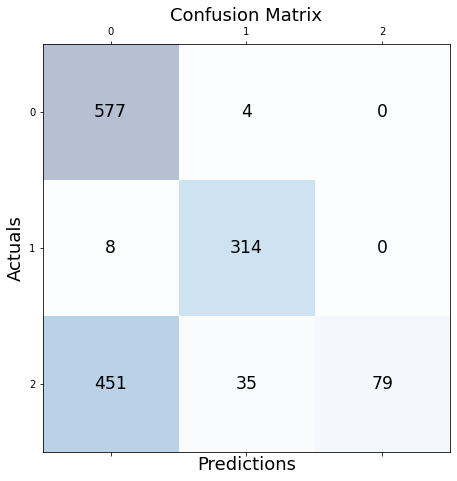

In [53]:
conf_matrix = confusion_matrix(Y_VAL,predictions)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [124]:
from keras.models import load_model
model = load_model("G:\\PYTHON\\FinalYr_Phase-2\\weights\\incpetion_v3.h5")

In [144]:
%matplotlib inline
# get sample image to test.
import numpy as np
import cv2
import matplotlib.pyplot as plt

img_covid = 'G:\\PYTHON\\Final_year_project\\Final\\covid_image_data\\covid_image_data\\Images\\COVID\\COVID-3.png'
img_normal = 'G:\\PYTHON\\FinalYr_Phase-2\\Normal\\Normal-99.png'
img_test = 'G:\\PYTHON\\FinalYr_Phase-2\\NON_COVID\\Non_COVID-15.png'

img_array = Image.open(img_normal)
new_img_array = np.array(img_array)
if new_img_array.ndim == 2:
    new_img_array = cv2.cvtColor(new_img_array, cv2.COLOR_GRAY2BGR)
new_img_array = cv2.resize(new_img_array,(224,224))




dt = []
dt.append(new_img_array)
X = np.array(dt)
X = X/255
val = model.predict(X)
print("Prediction :",np.argmax(val,axis=1))

Prediction : [0]
